# Experimental data

Get experimental data from [Wang2022](https://doi.org/10.1016/j.xcrp.2022.101047) directly from they Zenodo repo they kindely provided.

In [1]:
from zenodoExplorer.zenexp import ze
import pandas as pd

z2 = ze(ACCESS_TOKEN=None,recIDs=[6299956], base='https://zenodo.org/api/records/')
z2.get_chunk(6299956, 'glob.zip')

'.cache/6299956/glob'

Molar and by weight concentrations are:
$$ c = \frac{n_{EC}}{n_{EC} + n_{EMC}} => n_{EC} = c*(n_{EC}+n_{EMC}) ~{\rm and}~ n_{EMC} = (1-c)*(n_{EC}+n_{EMC})$$
$$ w = \frac{n_{EC} \times m_{EC}}{n_{EC} \times m_{EC} + n_{EMC} \times m_{EMC}} => n_{EC} = \frac{w} {m_{EC}} \times (n_{EC} \times m_{EC} + n_{EMC} \times m_{EMC}) ~{\rm and}~ n_{EMC} = \frac{1-w} {m_{EMC}} \times (n_{EC} \times m_{EC} + n_{EMC} \times m_{EMC}) $$

Therefore:
$$ c = \frac{w}{w + (1-w) \times \frac{m_{EC}}{m_{EMC}}} $$
$$ w = \frac{c}{c + (1-c) \times \frac{m_{EMC}}{m_{EC}}} $$

In [2]:
m_EC = 88.062
m_EMC = 104.105

def molar2mass(x):
    return(x/(x+(1-x)*m_EMC/m_EC))

def mass2molar(x):
    return(x/(x+((1-x)*m_EC/m_EMC)))

In [3]:
import numpy as np

edf = pd.read_csv('.cache/6299956/glob/ndrewwang-SolventSeg-a923bd4/trainingset/Ternary_Physicochemical_Training.csv')
edf = edf[edf['xLiPF6']==0]
del edf['ec']
del edf['xLiPF6']
edf['xEC'] = mass2molar(edf['xEC'])
edf['xEMC'] = 1.0-edf['xEC']

del edf['xEMC'] #redundant
del edf['k'] #zero
edf = edf.assign(c = np.full(20, np.nan))
edf = edf.assign(com = ['Wang22']*len(edf))

edf

,Temp,xEC,d,v,c,com
0,10,0.000000,1.0241,0.86,NaN,Wang22
10,10,0.336275,1.1121,0.97,NaN,Wang22
20,10,0.541742,1.1741,1.99,NaN,Wang22
30,10,0.733930,1.2434,3.17,NaN,Wang22
40,20,0.000000,1.0122,0.74,NaN,Wang22
50,20,0.336275,1.1006,0.66,NaN,Wang22
60,20,0.541742,1.1631,1.57,NaN,Wang22
70,20,0.733930,1.2320,2.15,NaN,Wang22
80,25,0.000000,1.0061,0.69,NaN,Wang22
90,25,0.336275,1.0948,0.83,NaN,Wang22


### add Holly's densities (NPJ computational)

In [4]:
dens_holly = pd.DataFrame({'Temp': [22, 22, 22], 'xEC': [0, 0.299, 0.693], 'd': [1.012, 1.090, 1.218], 'v': [np.nan, np.nan, np.nan], 'com': ['Holly23']*3})
edf = pd.concat([edf, dens_holly], ignore_index=True)
edf

,Temp,xEC,d,v,c,com
0,10,0.000000,1.0241,0.86,NaN,Wang22
1,10,0.336275,1.1121,0.97,NaN,Wang22
2,10,0.541742,1.1741,1.99,NaN,Wang22
3,10,0.733930,1.2434,3.17,NaN,Wang22
4,20,0.000000,1.0122,0.74,NaN,Wang22
5,20,0.336275,1.1006,0.66,NaN,Wang22
6,20,0.541742,1.1631,1.57,NaN,Wang22
7,20,0.733930,1.2320,2.15,NaN,Wang22
8,25,0.000000,1.0061,0.69,NaN,Wang22
9,25,0.336275,1.0948,0.83,NaN,Wang22


### add Holly's diffusivities ($\rm 10^{-6} cm^2/s$) at 25 C (email: PFG measurements on EC/EMC mixtures)
|  xEC  |   EC    |   EMC                     | EMCavg   | avg      |
|---:   |----:    |----:                      |----:     |----:     |
|  67%  |   8.290 |   8.335 8.341 8.321 8.332 |  8.33225 | 8.311125 |
|  33%  |   11.97 |   12.52 12.56 12.53 12.54 |  12.5375 | 12.25375 |
|  0%   |         |   18.24 18.28 18.22 18.25 |  18.2475 | 18.2475  |

In [5]:
diff_holly = pd.DataFrame({'Temp': [25, 25, 25], 'xEC': [0.67, 0.33, 0.0], 'd':[np.nan, np.nan, np.nan], 'v': [np.nan, np.nan, np.nan], 'c': [8.31, 12.25, 18.25], 'com': ['HollyProv']*3})
edf = pd.concat([edf, diff_holly], ignore_index=True)
edf

,Temp,xEC,d,v,c,com
0,10,0.000000,1.0241,0.86,NaN,Wang22
1,10,0.336275,1.1121,0.97,NaN,Wang22
2,10,0.541742,1.1741,1.99,NaN,Wang22
3,10,0.733930,1.2434,3.17,NaN,Wang22
4,20,0.000000,1.0122,0.74,NaN,Wang22
5,20,0.336275,1.1006,0.66,NaN,Wang22
6,20,0.541742,1.1631,1.57,NaN,Wang22
7,20,0.733930,1.2320,2.15,NaN,Wang22
8,25,0.000000,1.0061,0.69,NaN,Wang22
9,25,0.336275,1.0948,0.83,NaN,Wang22


### more data for pure EMC (provisional?)

In [6]:
diff_temp_holly = pd.DataFrame({'Temp': [25, 32, 42, 52], 'xEC': [0.0, 0.0, 0.0, 0.0], 'd':[np.nan, np.nan, np.nan, np.nan], 'v': [np.nan, np.nan, np.nan, np.nan], 'c': [18.3, 23.0, 26.2, 30.5], 'com': ['HollyProv']*4})
edf = pd.concat([edf, diff_temp_holly], ignore_index=True)
edf

,Temp,xEC,d,v,c,com
0,10,0.000000,1.0241,0.86,NaN,Wang22
1,10,0.336275,1.1121,0.97,NaN,Wang22
2,10,0.541742,1.1741,1.99,NaN,Wang22
3,10,0.733930,1.2434,3.17,NaN,Wang22
4,20,0.000000,1.0122,0.74,NaN,Wang22
5,20,0.336275,1.1006,0.66,NaN,Wang22
6,20,0.541742,1.1631,1.57,NaN,Wang22
7,20,0.733930,1.2320,2.15,NaN,Wang22
8,25,0.000000,1.0061,0.69,NaN,Wang22
9,25,0.336275,1.0948,0.83,NaN,Wang22


## Experimental data from Schrodinger paper [Daj22](https://pubs.acs.org/doi/suppl/10.1021/acs.jpcb.2c03746/suppl_file/jp2c03746_si_001.pdf) citing [Xu04](https://pubs.acs.org/doi/epdf/10.1021/cr030203g)

In [7]:
schr_exp = pd.DataFrame({'Temp': [25, 40], 'xEC': [0.0, 1.0], 'd':[1.01, 1.32], 'v': [0.65, 1.9], 'c': [np.nan, 8.00], 'com': ['Daj22']*2})
edf = pd.concat([edf, schr_exp], ignore_index=True)
edf

,Temp,xEC,d,v,c,com
0,10,0.000000,1.0241,0.86,NaN,Wang22
1,10,0.336275,1.1121,0.97,NaN,Wang22
2,10,0.541742,1.1741,1.99,NaN,Wang22
3,10,0.733930,1.2434,3.17,NaN,Wang22
4,20,0.000000,1.0122,0.74,NaN,Wang22
5,20,0.336275,1.1006,0.66,NaN,Wang22
6,20,0.541742,1.1631,1.57,NaN,Wang22
7,20,0.733930,1.2320,2.15,NaN,Wang22
8,25,0.000000,1.0061,0.69,NaN,Wang22
9,25,0.336275,1.0948,0.83,NaN,Wang22


# Fit GPR to incomplete Experimental Data

In [8]:
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def fit_data(lab, alpha=1e-3, N=100):

    train = edf[np.isnan(edf[lab])==False][['Temp', 'xEC', lab]] #subselect existing data
    Temps = np.unique(train['Temp'])

    pred = pd.DataFrame({'xEC': np.tile(np.linspace(0,1,N), len(np.arange(10,53))), 'Temp': np.arange(10,53).repeat(N)}) #define prediction support
    model = GaussianProcessRegressor(kernel=RBF(length_scale=[1,10]), alpha=alpha, n_restarts_optimizer=10)
    model.fit(train[['xEC','Temp']], train[lab])
    mean, std = model.predict(pred, return_std=True)
    pred = pred.assign(**{lab+'_avg': mean})
    pred = pred.assign(**{lab+'_std': std})

    for i, Temp in enumerate(Temps):
        plt.plot(train['xEC'][train['Temp']==Temp], train[lab][train['Temp']==Temp], 'x', color=f'C{i}')
        plt.plot(pred['xEC'][pred['Temp']==Temp], pred[lab+'_avg'][pred['Temp']==Temp], '-', color=f'C{i}', label=f'{Temp}C, {Temp+273}K')
        plt.fill_between(pred['xEC'][pred['Temp']==Temp],
                        pred[lab+'_avg'][pred['Temp']==Temp]-pred[lab+'_std'][pred['Temp']==Temp],
                        pred[lab+'_avg'][pred['Temp']==Temp]+pred[lab+'_std'][pred['Temp']==Temp], color=f'C{i}', alpha=0.3, edgecolor=None)
    
    plt.legend()
    plt.xlabel('EC:EMC molar composition')
    if lab=='d':
        plt.ylabel(r'Density (g/cm$^3$)')
    elif lab=='v':
        plt.ylabel(r'Viscosity (cP)')
    elif lab=='c':
        plt.ylabel(r'Diffusion Coefficient (10$^{-6}$ cm$^2$/s)')
    
    return model, pred



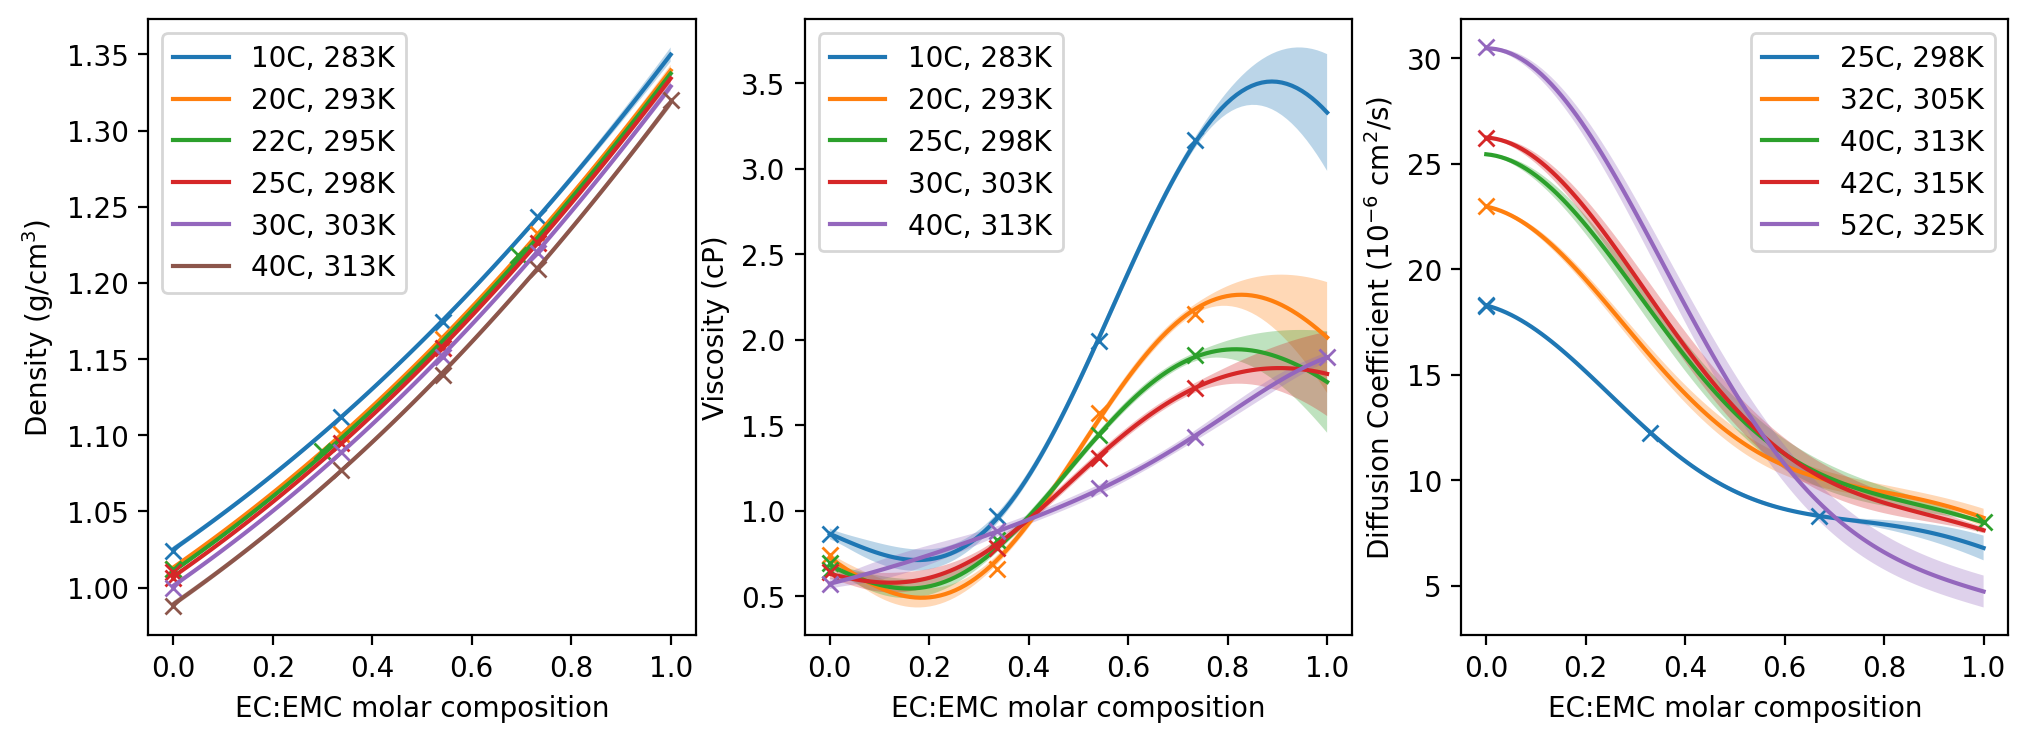

In [9]:
plt.figure(figsize=(12,4), dpi=200)
plt.subplot(1,3,1)
model_dens, pred = fit_data('d', alpha=1e-5, N=100)
plt.subplot(1,3,2)
model_visc, pred = fit_data('v', alpha=1e-3, N=100)
plt.subplot(1,3,3)
model_diff, pred = fit_data('c', alpha=1e-3, N=100)

In [10]:
import os
from joblib import dump

os.makedirs('.cache/exp', exist_ok=True)
dump(model_dens, '.cache/exp/dens.joblib');
dump(model_visc, '.cache/exp/visc.joblib');
dump(model_diff, '.cache/exp/diff.joblib');